In [69]:
#imports
import numpy as np
import pandas as pd
import sklearn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
from sklearn import linear_model
from matplotlib import pyplot as plt
%matplotlib inline 

In [73]:
#make a relevant df for linear regression
df = pd.read_csv('data.csv', usecols=['OP_CARRIER', 'ORIGIN', 'CRS_DEP_TIME','DEP_DELAY'])
df1= df.dropna(axis=0)
df1=df1[df1['DEP_DELAY']>0]
df1['CRS_DEP_TIME'] = df1['CRS_DEP_TIME'] / 100
df1['CRS_DEP_TIME']=df1['CRS_DEP_TIME'].astype('int')


In [92]:
#load df about details Airplane
AirplaneDF=pd.read_csv('Airplane_Data.csv')

In [74]:
df1

,OP_CARRIER,ORIGIN,CRS_DEP_TIME,DEP_DELAY
4,Virgin America,LAX,11,4.0
11,Virgin America,BOS,16,5.0
12,Virgin America,SFO,8,2.0
20,Virgin America,SFO,8,7.0
22,Virgin America,SFO,8,9.0
...,...,...,...,...
35841059,American Airlines,PDX,10,2.0
35841062,American Airlines,DFW,19,31.0
35841065,American Airlines,CLT,17,6.0
35841067,American Airlines,CLT,13,23.0


ERROR! Session/line number was not unique in database. History logging moved to new session 81
Please enter origin airport: BOS
Please enter departure hour: 4.5
Please enter Airline: American Airlines
details about the Airline:

Unnamed: 0                                                                      2
Airline                                                         American Airlines
IATA                                                                           AA
ICAO                                                                          AAL
Callsign                                                                 AMERICAN
Primary Hubs, Secondary Hubs                                    Dallas/Fort Worth
Founded                                                                      1926
Notes                           Founded as American Airways and commenced oper...
Name: 2, dtype: object


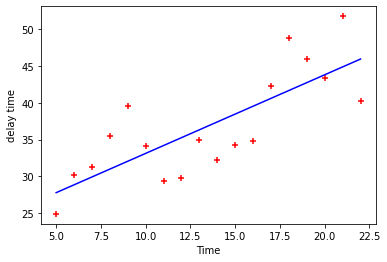

the estimated delay time is:  26.70636727024398
Please origin airport: 2
Please enter departure hour: 2
Please enter Airline: 2
Input is invalid!


In [108]:
### linear regression, predict the estimate delay time on departure
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
AirportOrigin = (input("Please enter origin airport: "))
Hour = float(input("Please enter departure hour: "))
Airline= (input("Please enter Airline: "))
while 24>=Hour>=0 and len((df1[df1['ORIGIN']==AirportOrigin]))>0 and (len(df1[df1['OP_CARRIER']==Airline]))>0:
    print('details about the Airline:\n')
    print(AirplaneDF.iloc[ AirplaneDF[AirplaneDF.Airline == Airline].index.tolist()[0]])
    y=[]
    con1=df1['ORIGIN']==AirportOrigin
    new=df1[con1 & con2]
    for i in range(0,24):
        y.append(new[new['CRS_DEP_TIME']==i].DEP_DELAY.mean(axis=0))
    datax=np.array(x)
    datay=np.array(y)
    dataset = pd.DataFrame()
    dataset['hour'] = datax.tolist()
    dataset['delay_time'] = datay.tolist()
    dataset = dataset.dropna(axis=0)
    reg=linear_model.LinearRegression()
    reg.fit(dataset[['hour']],dataset.delay_time)
    Z=reg.predict(np.array([hour]).reshape(1, 1))
    plt.xlabel('Time')
    plt.ylabel('delay time')
    plt.scatter(datax,datay,color='red',marker='+')
    plt.plot(dataset.hour,reg.predict(dataset[['hour']]),color='blue')
    plt.show()
    print('the estimated delay time is: ', Z[0])
    AirportOrigin = (input("Please origin airport: "))
    Hour = int(input("Please enter departure hour: "))
    Airline= (input("Please enter Airline: "))
print('Input is invalid!')

In [77]:
df = pd.read_csv('data.csv', usecols=['OP_CARRIER', 'DEST', 'CRS_ARR_TIME','ARR_DELAY'])
df2= df.dropna(axis=0)
df2=df2[df2['ARR_DELAY']>0]
df2['CRS_ARR_TIME'] = df2['CRS_ARR_TIME'] / 100
df2['CRS_ARR_TIME']=df2['CRS_ARR_TIME'].astype('int')

In [82]:
df2

,OP_CARRIER,DEST,CRS_ARR_TIME,ARR_DELAY
3,Virgin America,LAX,10,14.0
7,Virgin America,LAX,23,4.0
15,Virgin America,PHL,7,7.0
17,Virgin America,SFO,23,6.0
43,Virgin America,SFO,22,9.0
...,...,...,...,...
35841058,American Airlines,TPA,18,9.0
35841062,American Airlines,PHL,23,9.0
35841065,American Airlines,DFW,19,1.0
35841066,American Airlines,MEM,21,11.0


Please enter destination airport: BOS
Please enter arrival hour: 12.5
Please enter Airline: American Airlines
details about the Airline:

Unnamed: 0                                                                      2
Airline                                                         American Airlines
IATA                                                                           AA
ICAO                                                                          AAL
Callsign                                                                 AMERICAN
Primary Hubs, Secondary Hubs                                    Dallas/Fort Worth
Founded                                                                      1926
Notes                           Founded as American Airways and commenced oper...
Name: 2, dtype: object


<ipython-input-110-4b6c4d4a521f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new=df2[con1 & con2]


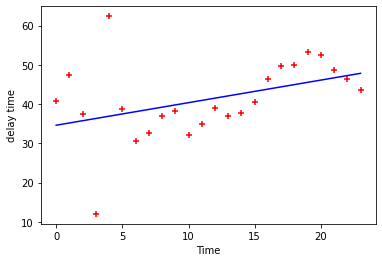

the estimated delay time is:  36.913197647444825
Please enter destination airport: 1
Please enter departure hour: 1
Please enter Airline: 1
Input is invalid!


In [110]:
# linear regression, predict the estimate delay time on arrival
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
AirportDestination = (input("Please enter destination airport: "))
Hour = float(input("Please enter arrival hour: "))
Airline= (input("Please enter Airline: "))
while 24>=Hour>=0 and len((df2[df2['DEST']==AirportDestination]))>0 and (len(df2[df2['OP_CARRIER']==Airline]))>0:
    print('details about the Airline:\n')
    print(AirplaneDF.iloc[ AirplaneDF[AirplaneDF.Airline == Airline].index.tolist()[0]])
    y=[]
    con1=df2['DEST']==AirportDestination
    new=df2[con1 & con2]
    for i in range(0,24):
        y.append(new[new['CRS_ARR_TIME']==i].ARR_DELAY.mean(axis=0))
    datax=np.array(x)
    datay=np.array(y)
    dataset = pd.DataFrame()
    dataset['hour'] = datax.tolist()
    dataset['delay_time'] = datay.tolist()
    dataset = dataset.dropna(axis=0)
    reg=linear_model.LinearRegression()
    reg.fit(dataset[['hour']],dataset.delay_time)
    Z=reg.predict(np.array([hour]).reshape(1, 1))
    plt.xlabel('Time')
    plt.ylabel('delay time')
    plt.scatter(datax,datay,color='red',marker='+')
    plt.plot(dataset.hour,reg.predict(dataset[['hour']]),color='blue')
    plt.show()
    print('the estimated delay time is: ', Z[0])
    AirportDestination = (input("Please enter destination airport: "))
    Hour = int(input("Please enter departure hour: "))
    Airline= (input("Please enter Airline: "))
print('Input is invalid!')